<a href="https://colab.research.google.com/github/Mmbsaksd/py/blob/master/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hotel Booking Analysis**




## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#**Data Pre-processing**

##**Importing libraries**

In [3]:
#Importing libraries

#importing pandas libraries with alias of pd
import pandas as pd

#importing numpy libraries with alias as np 
import numpy as np

#importing matplotlib library with alias as plt
import matplotlib.pyplot as plt

#importing seaborn library with alias of sns
import seaborn as sns

In [4]:
#Importing datasets
df = pd.read_csv("/content/Hotel Bookings.csv")

In [5]:
#Analyzing the first five row of dataset.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [6]:
#Analyzing the last five row of dataset.
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
111299,City Hotel,0,144,2017,May,18,6,2,1,2,...,No Deposit,52.0,NaN,0.0,Transient-Party,90.0,0.0,1.0,Check-Out,2017-05-09
111300,City Hotel,0,169,2017,May,18,6,2,1,1,...,No Deposit,52.0,NaN,25.0,Transient-Party,80.0,0.0,0.0,Check-Out,2017-05-09
111301,City Hotel,0,144,2017,May,18,6,2,1,2,...,No Deposit,52.0,NaN,0.0,Transient-Party,90.0,0.0,1.0,Check-Out,2017-05-09
111302,City Hotel,0,121,2017,May,19,7,2,0,2,...,No Deposit,14.0,NaN,0.0,Transient,117.0,1.0,0.0,Check-Out,2017-05-09
111303,City Hotel,0,90,2017,May,18,6,2,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Analyzing the shape of dataset
df.shape

(111304, 32)

In [21]:
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,3.0,No Deposit,0.0,0.0,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,4.0,No Deposit,0.0,0.0,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0.0,0.0,0.0,A,C,0.0,No Deposit,0.0,0.0,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0.0,0.0,0.0,A,A,0.0,No Deposit,304.0,0.0,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,240.0,0.0,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [8]:
#checking various types hotels
print((df["hotel"].unique()))

['Resort Hotel' 'City Hotel']


In [9]:
#collecting the information on quality and type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111304 entries, 0 to 111303
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           111304 non-null  object 
 1   is_canceled                     111304 non-null  int64  
 2   lead_time                       111304 non-null  int64  
 3   arrival_date_year               111304 non-null  int64  
 4   arrival_date_month              111304 non-null  object 
 5   arrival_date_week_number        111304 non-null  int64  
 6   arrival_date_day_of_month       111304 non-null  int64  
 7   stays_in_weekend_nights         111304 non-null  int64  
 8   stays_in_week_nights            111304 non-null  int64  
 9   adults                          111304 non-null  int64  
 10  children                        111300 non-null  float64
 11  babies                          111304 non-null  int64  
 12  meal            

In [10]:
df.isnull().sum().sort_values(ascending = False)

company                           104732
agent                              15825
country                              488
children                               4
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        1
deposit_type                           1
is_repeated_guest                      1
previous_cancellations                 1
days_in_waiting_list                   1
customer_type                          1
adr                                    1
required_car_parking_spaces            1
total_of_special_requests              1
reservation_status                     1
previous_bookings_not_canceled         1
reservation_status_date                1
distribution_channel                   1
is_canceled                            0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

##**Summary of data pre processing**

*   Dataset have 119390 rows and 32 columns
*   Dataset have null values in company, agent, country and children columns
*   Dataset have some object type datas




#**Data Cleaning**

In [12]:
#filling the missing value of company and agent with 0
df[['company','agent']]= df[['company','agent']].fillna(0)

#filling the missing value of country with mode
df['country']= df['country'].fillna(df.country.mode().to_string())

#filling the  missing value of childern value by replacing round value of mean
df['children']= df['children'].fillna(round(df.children.mean()))



#**Exploratory Data Analysis**

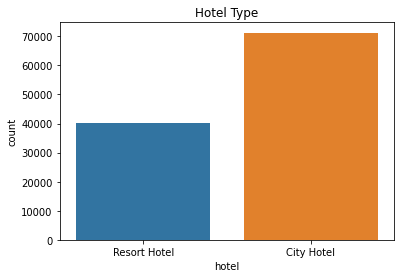

In [15]:
#Checking the count of the hotel
plt.title("Hotel Type")
sns.countplot(data=df, x=df.hotel)

In [ ]:
df.groupby([''])

In [18]:
df.is_canceled.unique()

array([0, 1])

In [42]:
#creating pie chart on is null status
cancelation = df[df['is_canceled']==1]['is_canceled'].value_counts().to_frame()
approved = df[df['is_canceled']==0]['is_canceled'].value_counts().to_frame()
approval_status = pd.concat([cancelation,approved])
approval_status.rename(columns = {'is_canceled':'Counts'},inplace=True)
approval_status.reset_index(level=0, inplace=True)
approval_status.rename(columns = {'index':'Status'},inplace=True)
approval_status.head()

,Counts
1,44220
0,67084


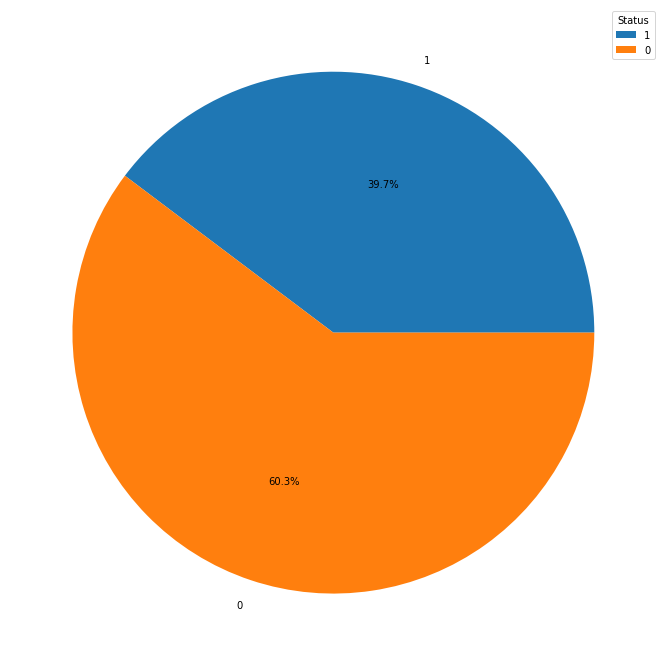

In [51]:
data = approval_status.Counts
label = approval_status.Status
explode = (0.1,0,0)

fig = plt.figure(figsize=(12,12))
plt.pie(data, labels= label, autopct='%1.1f%%')
plt.legend(title = "Status")
plt.show()

In [ ]:
plt.figure(figsize=(24,12))
corr = df.corr()
sns.heatmap(corr,annot=True,linewidths=1)
plt.show

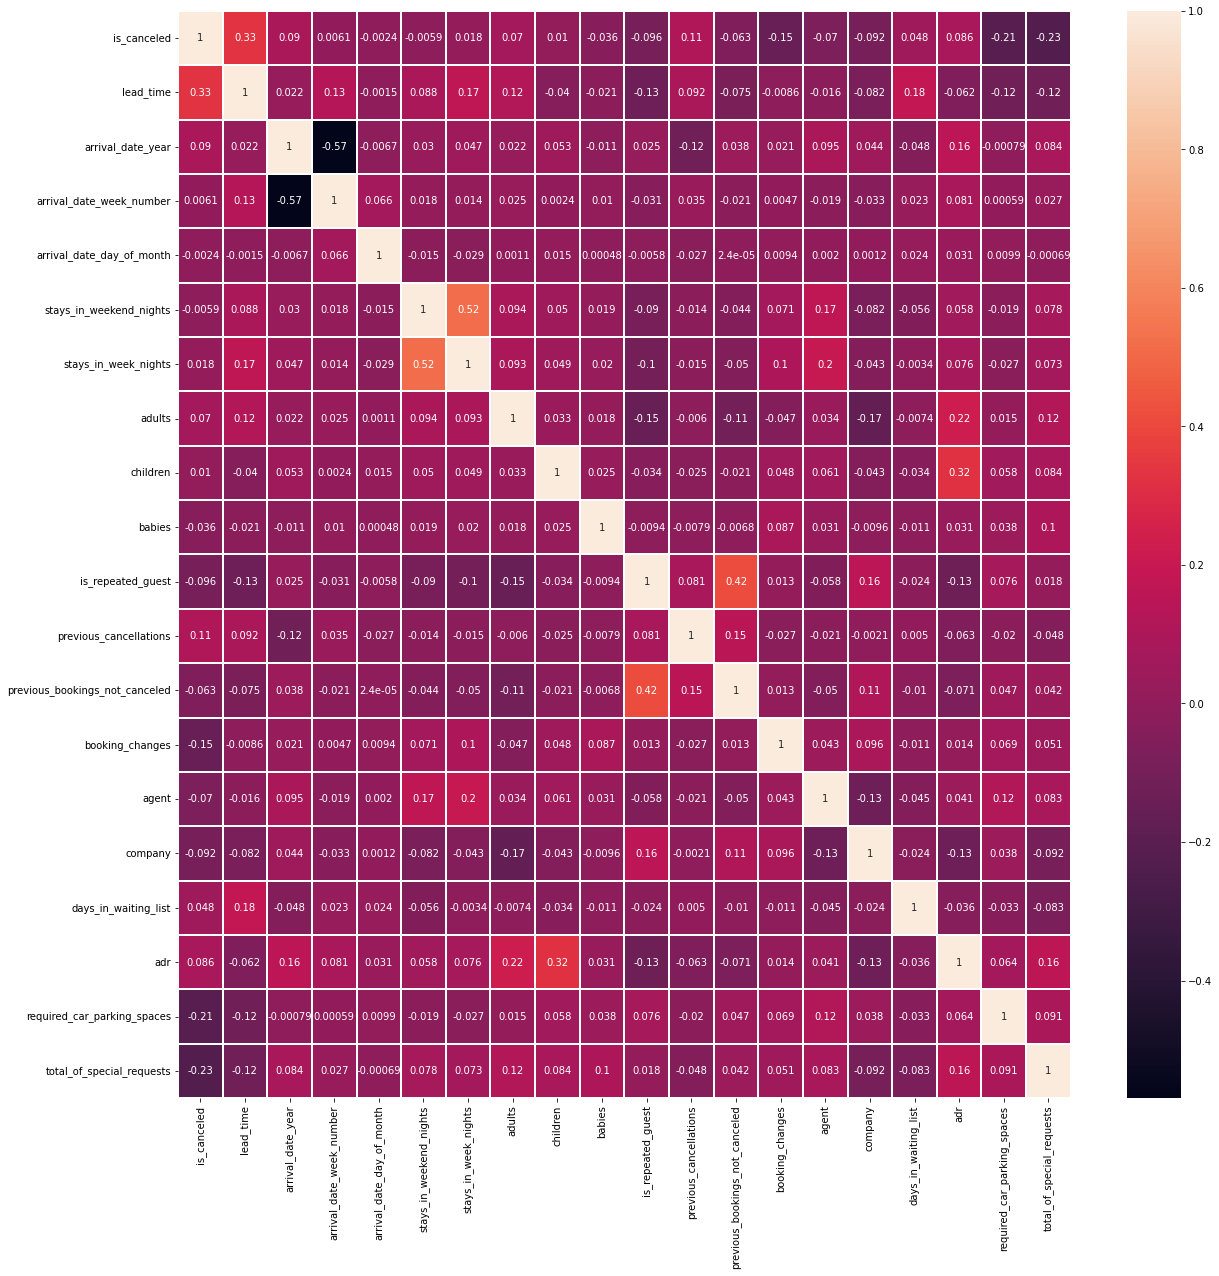

In [52]:
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr,annot=True, linewidths=1)
plt.show()
